In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('clusterized4_data.csv')
data.sample(10)

,Unnamed: 0,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k4_clusters,k5_clusters
120,120,121,Male,27,67,56,0,4
132,132,133,Female,25,72,34,3,3
40,40,41,Female,65,38,35,2,2
151,151,152,Male,39,78,88,0,4
197,197,198,Male,32,126,74,0,4
105,105,106,Female,21,62,42,0,4
173,173,174,Male,36,87,92,0,4
177,177,178,Male,27,88,69,0,4
60,60,61,Male,70,46,56,2,0
47,47,48,Female,27,40,47,0,0


In [3]:
data.set_index('CustomerID', inplace=True)
data.drop('Unnamed: 0', axis=1, inplace=True)
data.columns = ['gender','age','annual_income','spending_score','k4','k5']

In [39]:
data

,gender,age,annual_income,spending_score,k4,k5
CustomerID,,,,,,
1,Male,19,15,39,1,1
2,Male,21,15,81,1,1
3,Female,20,16,6,2,2
4,Female,23,16,77,1,1
5,Female,31,17,40,1,1
...,...,...,...,...,...,...
196,Female,35,120,79,0,4
197,Female,45,126,28,3,3
198,Male,32,126,74,0,4


In [5]:
data.shape

(200, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
 4   k4              200 non-null    int64 
 5   k5              200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 10.9+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,38.850,13.969007,18.0,28.75,36.0,49.0,70.0
annual_income,200.0,60.560,26.264721,15.0,41.50,61.5,78.0,137.0
spending_score,200.0,50.200,25.823522,1.0,34.75,50.0,73.0,99.0
k4,200.0,1.095,1.201329,0.0,0.00,1.0,2.0,3.0
k5,200.0,2.335,1.651184,0.0,0.75,3.0,4.0,4.0


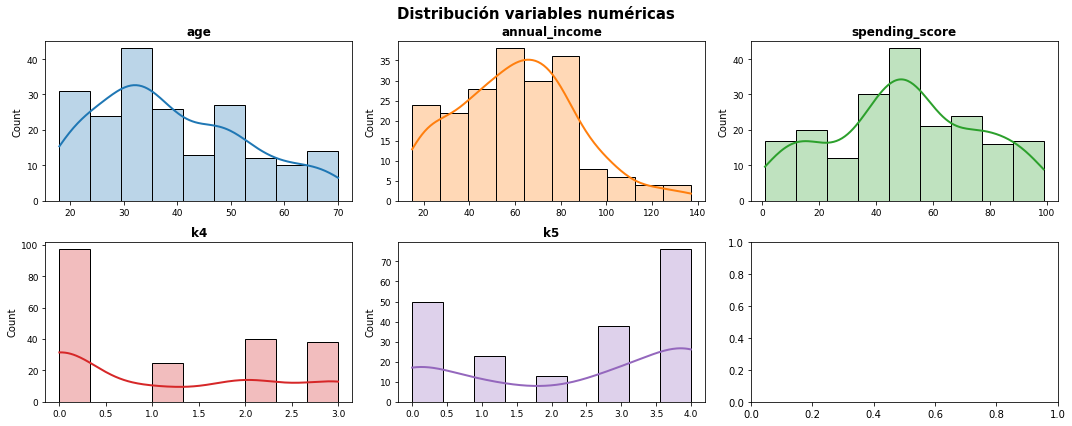

In [9]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

numerics = data.drop('gender', axis=1)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))
axes = axes.flat

for i, colum in enumerate(numerics):
    sns.histplot(
        data    = data,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 15, fontweight = "bold");

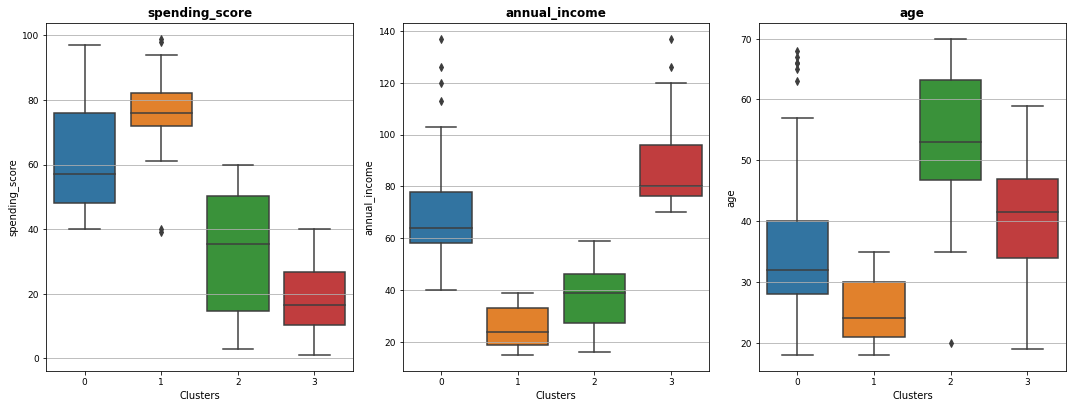

In [38]:
features = ['spending_score', 'annual_income', 'age']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
axes = axes.flat

for i, column in enumerate(features):
    sns.boxplot(
        data    = data,
        x       = 'k4',
        y       = column,
        ax      = axes[i]
        
    )
    axes[i].set_title(column, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("Clusters")
    axes[i].grid(axis='y')
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('', fontsize = 15, fontweight = "bold");

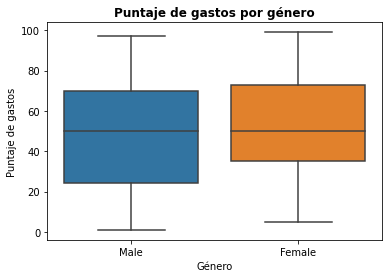

In [48]:
sns.boxplot(x='gender', y='spending_score', data=data)
plt.title('Puntaje de gastos por género', weight='bold')
plt.xlabel('Género')
plt.ylabel('Puntaje de gastos')
plt.show()

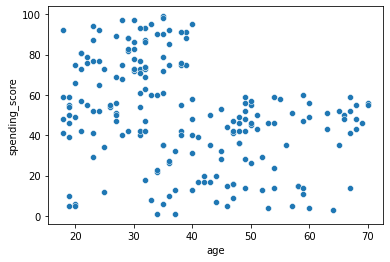

In [52]:
sns.scatterplot(x='age', y='spending_score', data=data)
plt.show()